<center>
    <h1><font color=darkred>Machine learning in action </font></h1>
    <h1><font color=darkred> Decision tree </font></h1>
    <h3>Le Hai Phu</h3>
    <h4>Student name:    </h4>
    <hr>
    <h1>Exercise 9: Predict the occcurence of a civil war </h1>
    <h3> 2024</h3>
</center

 **Can you predict whether a country is undergoing a
civil war?**

This dataset contains information about whether a civil war was occurring at a particular time in a particular
country. Country and time information have been purposely scrubbed from the dataset, as your goal is simply to
learn an association (if it exists) between measures of schooling, exports, population, etc., and whether a civil war
was occuring at the point in time when the data were gathered.

*   exports a measure of the dependence of a country on commodity exports
*   schooling percentage, school enrollment rate for males


*   growth annual GDP growth rate
*   concentration population concentration, from 0 to 1 (all in one city)


*   lnpop natural logarithm of the country’s population
*   fractionalization index measuring divides on ethnic/religious lines

*   dominance YES if one ethnic group dominates the country, NO otherwise
*   civil.war YES if civil war was occurring when the data were gathered, NO otherwise









In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Please develop different classification models: Logistic regression, KNN, and Decision tree**

#Load libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Read the dataset

In [3]:
df = pd.read_csv("/content/drive/MyDrive/ML/ML review/Class 9 - Decision trees/Datasets/civilWar.csv")

In [4]:
df.head(5)

,exports,schooling,growth,concentration,lnpop,fractionalization,dominance,civil.war
0,0.190,10.0,-1.682,0.916,16.293980,132,YES,NO
1,0.193,16.0,2.843,0.916,16.436260,132,YES,NO
2,0.269,26.0,4.986,0.916,16.589220,132,YES,NO
3,0.368,40.0,3.261,0.916,16.742380,132,YES,NO
4,0.170,59.0,1.602,0.916,16.901039,132,YES,NO


# Rename columns if necessary

# Convert 2 columns Dominance and Civil.war: YES: 1 and NO: 0


In [5]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

le = LabelEncoder()
df['dominance'] = le.fit_transform(df['dominance'])
df['civil.war'] = le.fit_transform(df['civil.war'])


In [6]:
df.head(5)

,exports,schooling,growth,concentration,lnpop,fractionalization,dominance,civil.war
0,0.190,10.0,-1.682,0.916,16.293980,132,1,0
1,0.193,16.0,2.843,0.916,16.436260,132,1,0
2,0.269,26.0,4.986,0.916,16.589220,132,1,0
3,0.368,40.0,3.261,0.916,16.742380,132,1,0
4,0.170,59.0,1.602,0.916,16.901039,132,1,0


# Split X, y


In [7]:
y = df['civil.war']
X = df.drop('civil.war', axis=1)


# Scaling for X using Minmaxscaler


In [8]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)



# Train test split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [11]:
param_grid = {
    'penalty': ['l1'],
    'C': np.logspace(-4, 4, 10)
}
logreg_l1 = LogisticRegression(max_iter=10000, solver='liblinear')
logreg_l1_cv = GridSearchCV(estimator=logreg_l1, param_grid=param_grid, cv = 10, scoring='accuracy')
logreg_l1_cv.fit(X_train, y_train)
print("tuned hpyerparameters :(best parameters) ",logreg_l1_cv.best_params_)
print("accuracy :",logreg_l1_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.0001, 'penalty': 'l1'}
accuracy : 0.8726244343891404


In [12]:
param_grid = {
    'penalty': ['l2'],
    'C': np.logspace(-4, 4, 10)
}
logreg_l2 = LogisticRegression(max_iter=10000, solver='liblinear')
logreg_l2_cv = GridSearchCV(estimator=logreg_l2, param_grid=param_grid, cv = 10, scoring='accuracy')
logreg_l2_cv.fit(X_train, y_train)
print("tuned hpyerparameters :(best parameters) ",logreg_l2_cv.best_params_)
print("accuracy :",logreg_l2_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.0001, 'penalty': 'l2'}
accuracy : 0.8726244343891404


In [13]:
logreg = LogisticRegression(C=0.0001, penalty='l2',  solver='lbfgs', max_iter=10000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

In [14]:
confusion_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
print("Accuracy score of the Logistics Regression:", accuracy_score(y_test, y_pred_logreg))
print("Logistics Regression Classification:")
print(confusion_matrix_logreg)

Accuracy score of the Logistics Regression: 0.852017937219731
Logistics Regression Classification:
[[190   0]
 [ 33   0]]


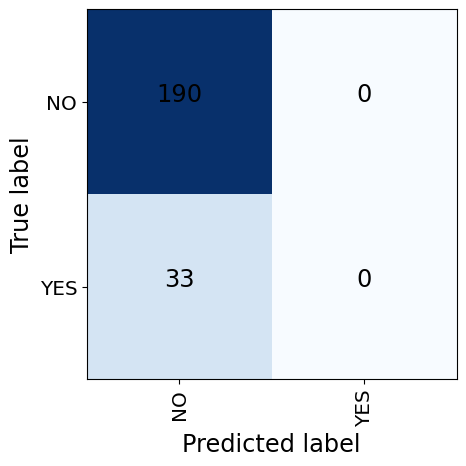

In [15]:
plt.imshow(confusion_matrix_logreg, cmap=plt.cm.Blues)
plt.text(0, 0, '{}'.format(confusion_matrix_logreg[0, 0]), horizontalalignment='center',fontsize = 'xx-large')
plt.text(0, 1, '{}'.format(confusion_matrix_logreg[1, 0]), horizontalalignment='center',fontsize = 'xx-large')
plt.text(1, 0, '{}'.format(confusion_matrix_logreg[0, 1]), horizontalalignment='center',fontsize = 'xx-large')
plt.text(1, 1, '{}'.format(confusion_matrix_logreg[1, 1]), horizontalalignment='center',fontsize = 'xx-large')
tick_marks = [0,1]
labels = ['NO', 'YES']
plt.xticks(tick_marks, labels, rotation=90,fontsize = 'x-large')
plt.yticks(tick_marks, labels,fontsize = 'x-large')
plt.ylabel('True label',fontsize = 'xx-large')
plt.xlabel('Predicted label',fontsize = 'xx-large')
plt.show()

In [16]:
print('Classification Report of Logistic Regression model:')
print(classification_report(y_test, y_pred_logreg))

Classification Report of Logistic Regression model:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       190
           1       0.00      0.00      0.00        33

    accuracy                           0.85       223
   macro avg       0.43      0.50      0.46       223
weighted avg       0.73      0.85      0.78       223



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [17]:
# Create AUC Score For Logistics Regression
LogregPreds = logreg.predict_proba(X_test).T[1]
fprlogreg, tprlogreg, threshlogreg = roc_curve(y_test, LogregPreds)
roc_auc_logreg = roc_auc_score(y_test, LogregPreds)

## KNN

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10]}

In [20]:
knn = KNeighborsClassifier()
knn_model = GridSearchCV(knn, params, cv=5)
knn_model.fit(X_train, y_train)

print(knn_model.best_params_)
print(knn_model.best_score_)
print(pd.DataFrame(knn_model.cv_results_))

{'n_neighbors': 4}
0.8783607169529499
   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.002627      0.000375         0.013188        0.000769   
1       0.002339      0.000131         0.012844        0.001098   
2       0.002326      0.000153         0.012634        0.000541   
3       0.002574      0.000121         0.012893        0.000509   
4       0.002454      0.000130         0.012478        0.000446   
5       0.002558      0.000317         0.014131        0.003198   
6       0.002529      0.000230         0.014044        0.002412   
7       0.002437      0.000065         0.014894        0.002547   
8       0.003912      0.001524         0.016160        0.003095   

   param_n_neighbors               params  split0_test_score  \
0                  2   {'n_neighbors': 2}           0.903846   
1                  3   {'n_neighbors': 3}           0.923077   
2                  4   {'n_neighbors': 4}           0.894231   
3                  5   {'n_neighbor

In [21]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

#predict via the model ---------------------------------------------------------
y_pred_knn = knn.predict(X_test)

confusion_matrix_knn = confusion_matrix(y_test, y_pred_knn)

print("Accuracy score of the KNN:", accuracy_score(y_test, y_pred_knn))
print("KNN Classification:")
print(confusion_matrix_knn)

Accuracy score of the KNN: 0.852017937219731
KNN Classification:
[[186   4]
 [ 29   4]]


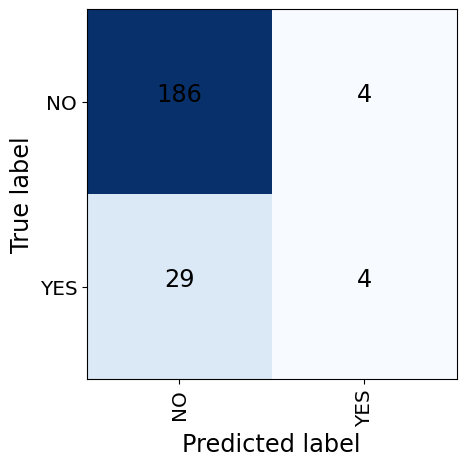

In [22]:
plt.imshow(confusion_matrix_knn, cmap=plt.cm.Blues)
plt.text(0, 0, '{}'.format(confusion_matrix_knn[0, 0]), horizontalalignment='center',fontsize = 'xx-large')
plt.text(0, 1, '{}'.format(confusion_matrix_knn[1, 0]), horizontalalignment='center',fontsize = 'xx-large')
plt.text(1, 0, '{}'.format(confusion_matrix_knn[0, 1]), horizontalalignment='center',fontsize = 'xx-large')
plt.text(1, 1, '{}'.format(confusion_matrix_knn[1, 1]), horizontalalignment='center',fontsize = 'xx-large')
tick_marks = [0,1]
labels = ['NO', 'YES']
plt.xticks(tick_marks, labels, rotation=90,fontsize = 'x-large')
plt.yticks(tick_marks, labels,fontsize = 'x-large')
plt.ylabel('True label',fontsize = 'xx-large')
plt.xlabel('Predicted label',fontsize = 'xx-large')
plt.show()

In [23]:
print('Classification Report of KNN model:')
print(classification_report(y_test, y_pred_knn))

Classification Report of KNN model:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       190
           1       0.50      0.12      0.20        33

    accuracy                           0.85       223
   macro avg       0.68      0.55      0.56       223
weighted avg       0.81      0.85      0.81       223



In [24]:
# Create AUC Score For KNN
KnnPreds = knn.predict_proba(X_test)[:,1]
fprknn, tprknn, threshknn = roc_curve(y_test, KnnPreds)
roc_auc_knn = roc_auc_score(y_test, KnnPreds)

## Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
#Build the decision tree
param_grid = {'max_depth' : [2,3,4, 5, 6, 7, 8, 9, 10],
              'criterion' :['gini', 'entropy']
             }

In [29]:
dtc_clf = DecisionTreeClassifier(random_state=1000)
dtc_clf_cv = GridSearchCV(estimator=dtc_clf, param_grid=param_grid, cv=5, verbose=True)
dtc_clf_cv.fit(X_train, y_train)

dtc_clf_cv.best_score_
dtc_clf_cv.best_params_

Fitting 5 folds for each of 18 candidates, totalling 90 fits


{'criterion': 'gini', 'max_depth': 2}

In [28]:
dtc_clf_tuned = DecisionTreeClassifier (criterion = "gini",
                                  max_depth=2, random_state=7 )
dtc_clf_tuned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=7)

In [30]:
y_pred_dtc = dtc_clf_tuned.predict(X_test)

confusion_matrix_dtc = confusion_matrix(y_test, y_pred_dtc)

print("Accuracy score of the KNN:", accuracy_score(y_test, y_pred_dtc))
print("KNN Classification:")
print(confusion_matrix_dtc)

Accuracy score of the KNN: 0.852017937219731
KNN Classification:
[[190   0]
 [ 33   0]]


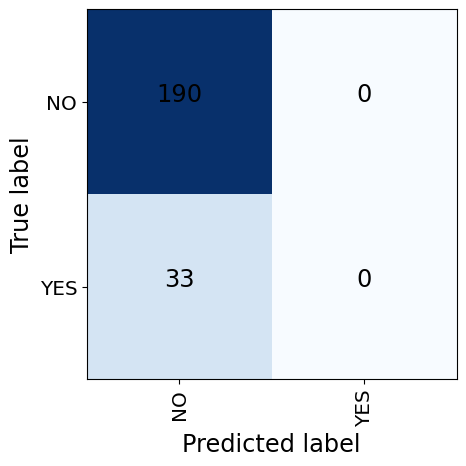

In [31]:
plt.imshow(confusion_matrix_dtc, cmap=plt.cm.Blues)
plt.text(0, 0, '{}'.format(confusion_matrix_dtc[0, 0]), horizontalalignment='center',fontsize = 'xx-large')
plt.text(0, 1, '{}'.format(confusion_matrix_dtc[1, 0]), horizontalalignment='center',fontsize = 'xx-large')
plt.text(1, 0, '{}'.format(confusion_matrix_dtc[0, 1]), horizontalalignment='center',fontsize = 'xx-large')
plt.text(1, 1, '{}'.format(confusion_matrix_dtc[1, 1]), horizontalalignment='center',fontsize = 'xx-large')
tick_marks = [0,1]
labels = ['NO', 'YES']
plt.xticks(tick_marks, labels, rotation=90,fontsize = 'x-large')
plt.yticks(tick_marks, labels,fontsize = 'x-large')
plt.ylabel('True label',fontsize = 'xx-large')
plt.xlabel('Predicted label',fontsize = 'xx-large')
plt.show()

In [32]:
print('Classification Report of Decision Tree Model:')
print(classification_report(y_test, y_pred_dtc))

Classification Report of Decision Tree Model:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       190
           1       0.00      0.00      0.00        33

    accuracy                           0.85       223
   macro avg       0.43      0.50      0.46       223
weighted avg       0.73      0.85      0.78       223



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [33]:
# Create AUC Score For Decision Tree
DTCPreds = dtc_clf_tuned.predict_proba(X_test)[:,1]
fprdct, tprdct, threshdct = roc_curve(y_test, DTCPreds)
roc_auc_dtc = roc_auc_score(y_test, DTCPreds)

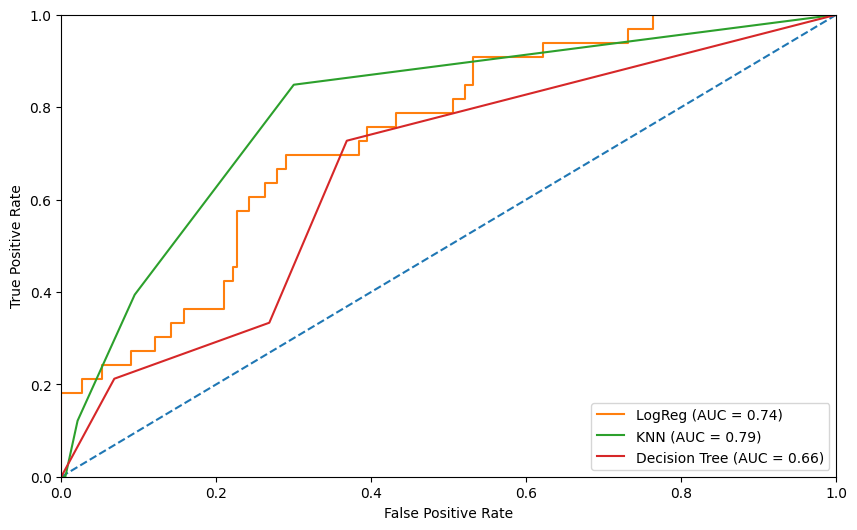

In [34]:
fig = plt.figure(figsize=(10, 6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fprlogreg, tprlogreg, label='LogReg (AUC = %0.2f)' % roc_auc_logreg)
plt.plot(fprknn, tprknn, label='KNN (AUC = %0.2f)' % roc_auc_knn)
plt.plot(fprdct, tprdct, label='Decision Tree (AUC = %0.2f)' % roc_auc_dtc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right');
plt.show()